In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/data (1).csv")
print(df.head())
print(df.shape)

   ID No Prog Code   YoG  CGPA100  CGPA200  CGPA300  CGPA400  CGPA    GRADE
0  42308       ICE  2010     2.88     3.48     2.62     2.90  3.23     GOOD
1  70978       BCH  2010     3.25     4.26     3.37     3.47  3.58     GOOD
2  31602       BCH  2010     1.78     1.98     1.49     2.51  2.21  AVERAGE
3  30158       BCH  2010     3.61     3.69     3.63     4.58  3.88     GOOD
4  51740       BCH  2010     2.66     2.98     3.28     3.07  2.97  AVERAGE
(2490, 9)


In [ ]:
X = df.drop(['ID No','Prog Code','YoG','GRADE'],axis=1)
y = df['GRADE']

In [ ]:
X

,CGPA100,CGPA200,CGPA300,CGPA400,CGPA
0,2.88,3.48,2.62,2.90,3.23
1,3.25,4.26,3.37,3.47,3.58
2,1.78,1.98,1.49,2.51,2.21
3,3.61,3.69,3.63,4.58,3.88
4,2.66,2.98,3.28,3.07,2.97
...,...,...,...,...,...
2485,3.51,2.75,2.80,2.87,3.11
2486,3.76,3.43,3.39,3.65,3.65
2487,3.62,3.07,3.31,2.57,3.32
2488,3.82,3.08,3.72,3.36,3.56


In [ ]:
y

0          GOOD
1          GOOD
2       AVERAGE
3          GOOD
4       AVERAGE
         ...   
2485       GOOD
2486       GOOD
2487       GOOD
2488       GOOD
2489       GOOD
Name: GRADE, Length: 2490, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 98   0   1]
 [  0 146   0]
 [  0   0 253]]
              precision    recall  f1-score   support

     AVERAGE       1.00      0.99      0.99        99
   EXCELLENT       1.00      1.00      1.00       146
        GOOD       1.00      1.00      1.00       253

    accuracy                           1.00       498
   macro avg       1.00      1.00      1.00       498
weighted avg       1.00      1.00      1.00       498



In [ ]:
print(accuracy_score(y_test, y_pred))

0.9979919678714859


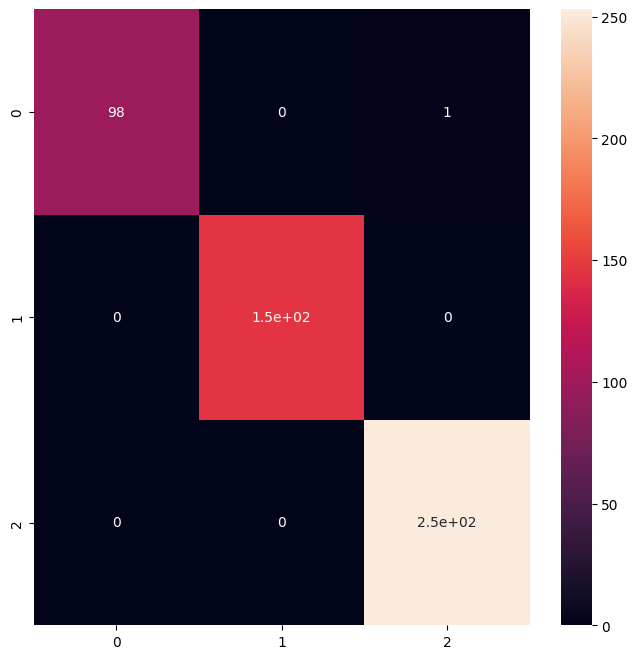

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred1 = nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred1)
print(cm)
print(classification_report(y_test, y_pred1))

[[ 98   0   1]
 [  0 139   7]
 [  5   4 244]]
              precision    recall  f1-score   support

     AVERAGE       0.95      0.99      0.97        99
   EXCELLENT       0.97      0.95      0.96       146
        GOOD       0.97      0.96      0.97       253

    accuracy                           0.97       498
   macro avg       0.96      0.97      0.97       498
weighted avg       0.97      0.97      0.97       498



In [ ]:
print(accuracy_score(y_test, y_pred1))

0.9658634538152611


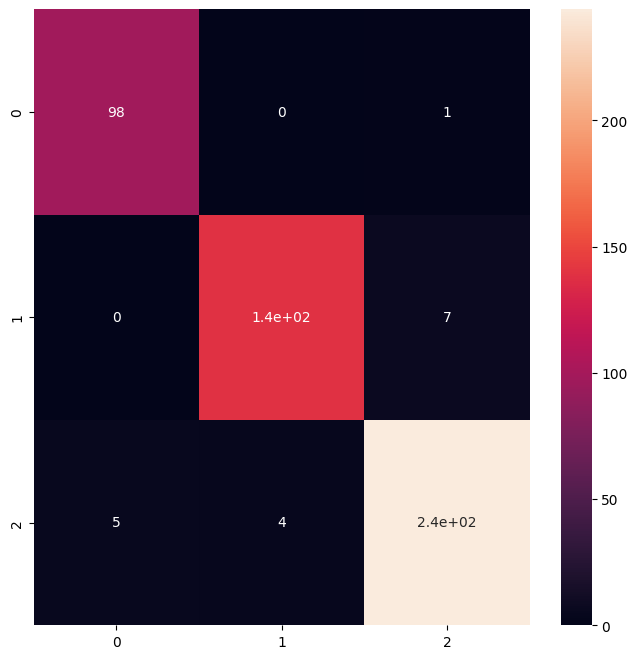

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm1=confusion_matrix(y_test, y_pred2)
print(cm1)
print(classification_report(y_test, y_pred2))

[[ 98   0   1]
 [  0 146   0]
 [  0   0 253]]
              precision    recall  f1-score   support

     AVERAGE       1.00      0.99      0.99        99
   EXCELLENT       1.00      1.00      1.00       146
        GOOD       1.00      1.00      1.00       253

    accuracy                           1.00       498
   macro avg       1.00      1.00      1.00       498
weighted avg       1.00      1.00      1.00       498



In [ ]:
print(accuracy_score(y_test, y_pred2))

0.9979919678714859


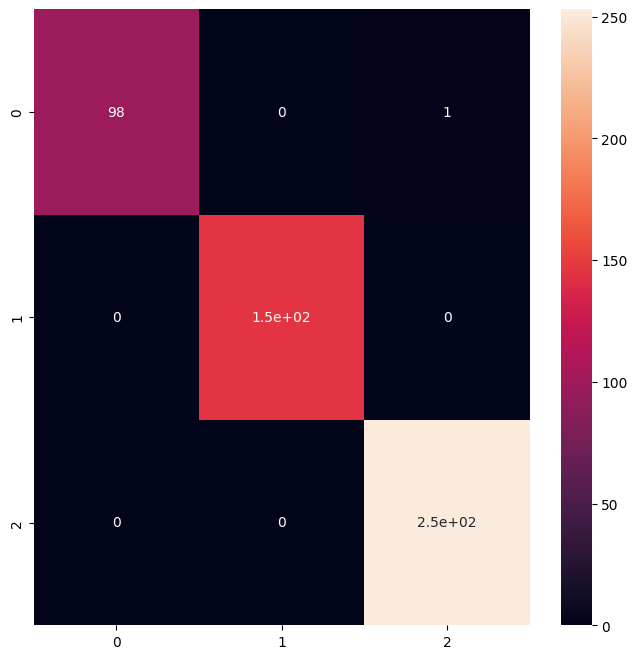

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm1,annot=True)
plt.show()

In [ ]:
df['GRADE'].replace(['AVERAGE','GOOD','EXCELLENT'],[0,1,2],inplace=True)
df.head()

,ID No,Prog Code,YoG,CGPA100,CGPA200,CGPA300,CGPA400,CGPA,GRADE
0,42308,ICE,2010,2.88,3.48,2.62,2.90,3.23,1
1,70978,BCH,2010,3.25,4.26,3.37,3.47,3.58,1
2,31602,BCH,2010,1.78,1.98,1.49,2.51,2.21,0
3,30158,BCH,2010,3.61,3.69,3.63,4.58,3.88,1
4,51740,BCH,2010,2.66,2.98,3.28,3.07,2.97,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred3 =xgb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred3)
print(cm)
print(classification_report(y_test, y_pred3))

[[132   0   0]
 [  1 240   0]
 [  0   0 125]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       132
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       125

    accuracy                           1.00       498
   macro avg       1.00      1.00      1.00       498
weighted avg       1.00      1.00      1.00       498



In [ ]:
print(accuracy_score(y_test, y_pred3))

0.9979919678714859


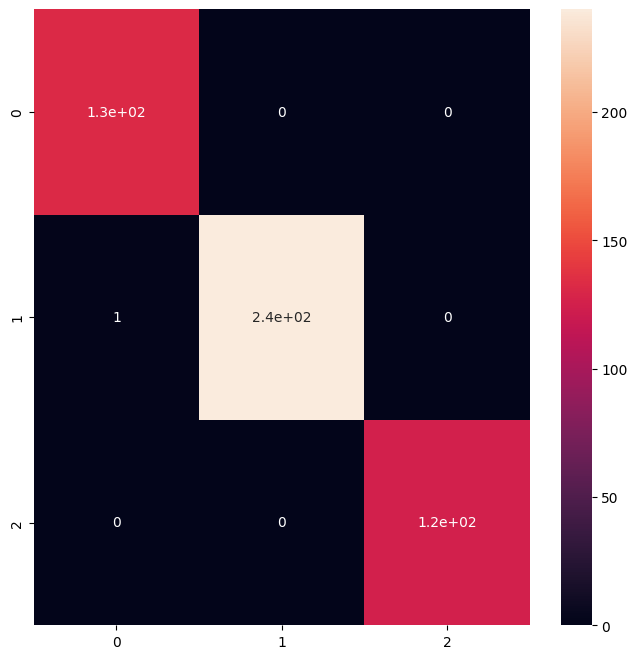

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
Classifier1=LogisticRegression(solver='liblinear')
Classifier1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred4=Classifier1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred4)
print(cm)
print(classification_report(y_test, y_pred4))

[[113  19   0]
 [  2 222  17]
 [  0  11 114]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       132
           1       0.88      0.92      0.90       241
           2       0.87      0.91      0.89       125

    accuracy                           0.90       498
   macro avg       0.91      0.90      0.90       498
weighted avg       0.91      0.90      0.90       498



In [ ]:
print(accuracy_score(y_test, y_pred4))

0.9016064257028112


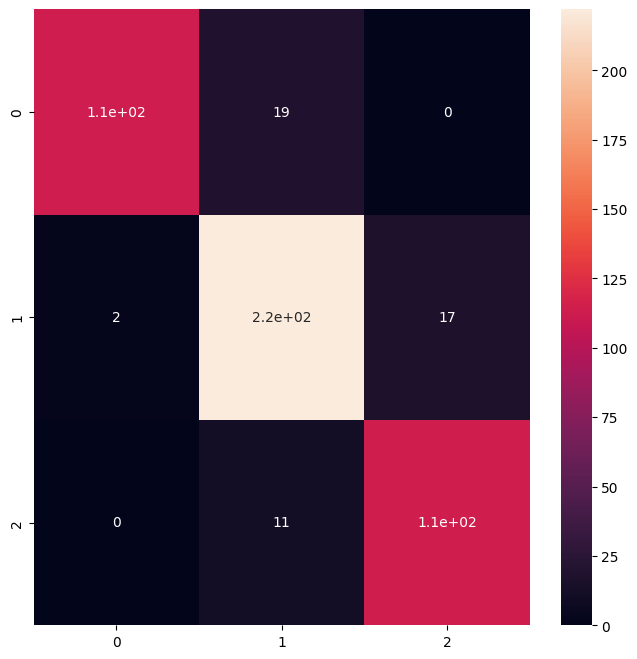

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(random_state=96)
clf.fit(X_train,y_train)

AdaBoostClassifier(random_state=96)

In [ ]:
y_pred5=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred5)
print(cm)
print(classification_report(y_test, y_pred5))

[[130   2   0]
 [  0 241   0]
 [  0   1 124]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       132
           1       0.99      1.00      0.99       241
           2       1.00      0.99      1.00       125

    accuracy                           0.99       498
   macro avg       1.00      0.99      0.99       498
weighted avg       0.99      0.99      0.99       498



In [ ]:
print(accuracy_score(y_test, y_pred5))

0.9939759036144579


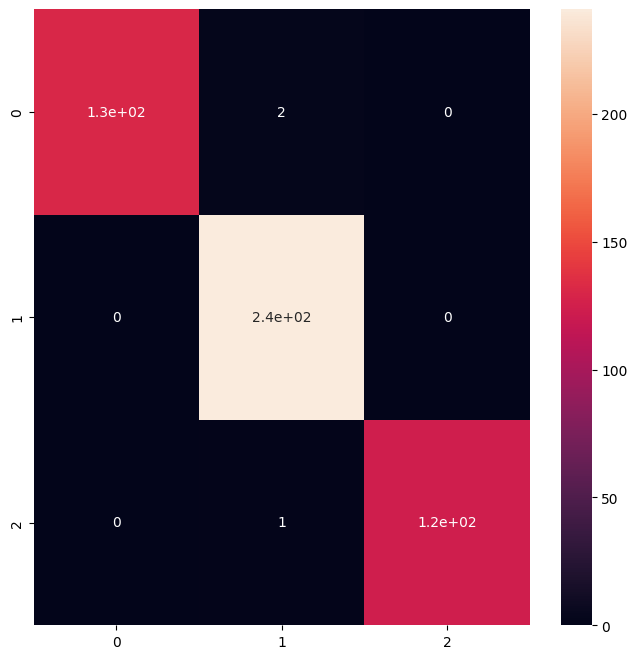

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC(kernel='linear',random_state=1)
model.fit(X_train,y_train)
y_pred6=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred6)
print(cm)
print(classification_report(y_test, y_pred6))

[[117   0   4]
 [  0 130   5]
 [  5   4 233]]
              precision    recall  f1-score   support

     AVERAGE       0.96      0.97      0.96       121
   EXCELLENT       0.97      0.96      0.97       135
        GOOD       0.96      0.96      0.96       242

    accuracy                           0.96       498
   macro avg       0.96      0.96      0.96       498
weighted avg       0.96      0.96      0.96       498



In [ ]:
print(accuracy_score(y_test, y_pred6))

0.963855421686747


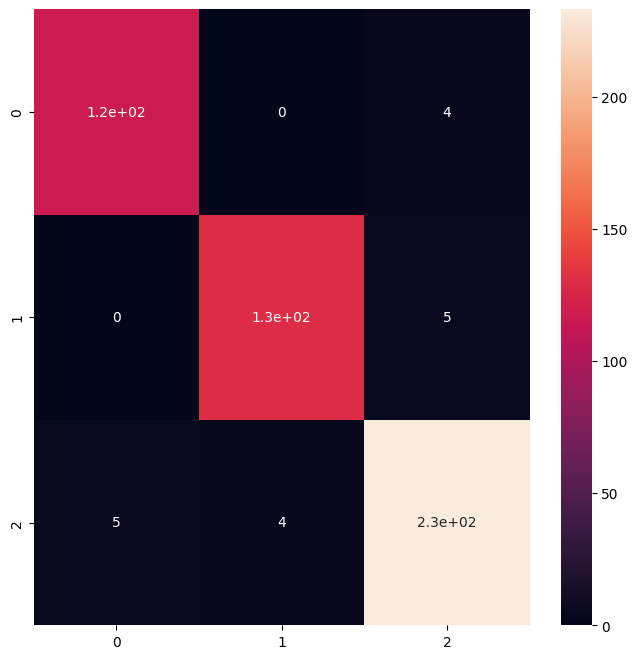

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
model=SVC(kernel='rbf',random_state=1)
model.fit(X_train,y_train)
y_pred7=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred7)
print(cm)
print(classification_report(y_test, y_pred7))

[[117   0   4]
 [  0 130   5]
 [  6   5 231]]
              precision    recall  f1-score   support

     AVERAGE       0.95      0.97      0.96       121
   EXCELLENT       0.96      0.96      0.96       135
        GOOD       0.96      0.95      0.96       242

    accuracy                           0.96       498
   macro avg       0.96      0.96      0.96       498
weighted avg       0.96      0.96      0.96       498



In [ ]:
print(accuracy_score(y_test, y_pred7))

0.9598393574297188


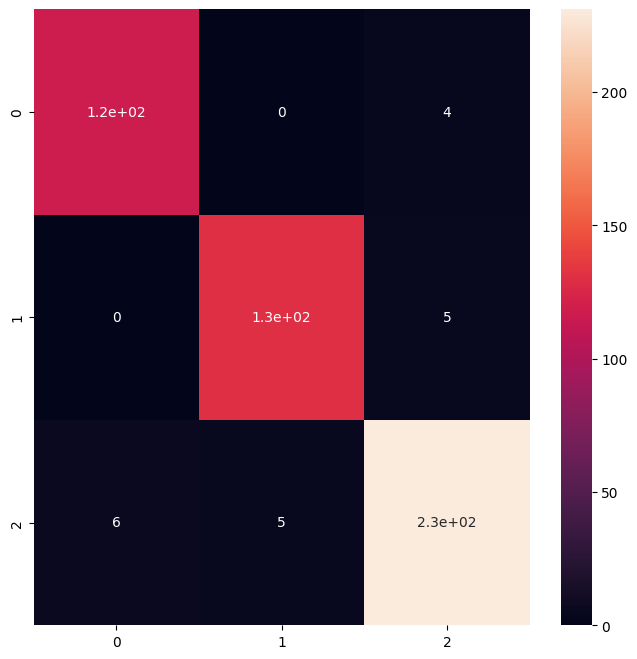

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
model=SVC(kernel='poly',random_state=1)
model.fit(X_train,y_train)
y_pred8=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred8)
print(cm)
print(classification_report(y_test, y_pred8))

[[121   0   0]
 [  0 133   2]
 [  1   0 241]]
              precision    recall  f1-score   support

     AVERAGE       0.99      1.00      1.00       121
   EXCELLENT       1.00      0.99      0.99       135
        GOOD       0.99      1.00      0.99       242

    accuracy                           0.99       498
   macro avg       0.99      0.99      0.99       498
weighted avg       0.99      0.99      0.99       498



In [ ]:
print(accuracy_score(y_test, y_pred8))

0.9939759036144579


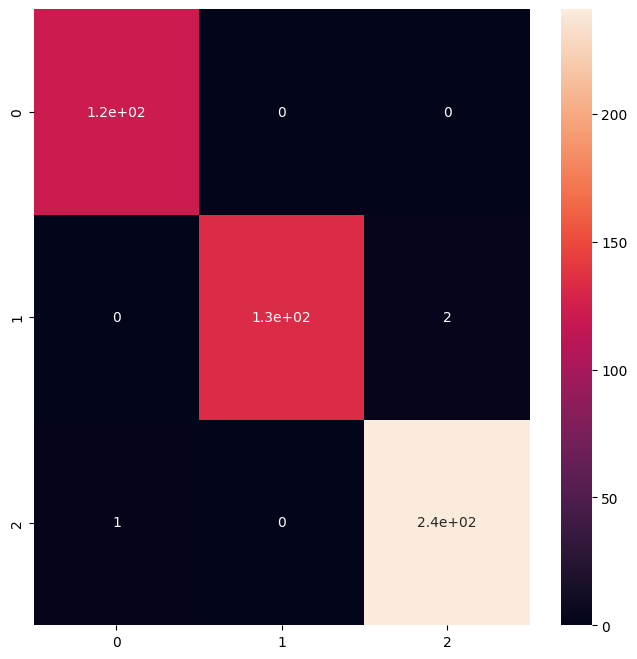

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.show()